# Course3
## Natural Language Processing in TensorFlow
## Week3

We've created a number of notebooks for you to explore the different types of sequence models. Spend some time going through these to see how they work, and what the impact of different layer types have on training for classification.

# Single Layer LSTM

In [1]:
# With this code Python 2.x code would run like Python 3.x
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 2
# if you've opened other python files, you would get an error
history = model.fit(train_dataset,
                    epochs=NUM_EPOCHS,
                    validation_data=test_dataset)

Epoch 1/2


178/391 [============>.................] - ETA: 0s - loss: 0.6883 - accuracy: 0.59 - ETA: 11:58 - loss: 0.6909 - accuracy: 0.554 - ETA: 12:50 - loss: 0.6931 - accuracy: 0.526 - ETA: 13:44 - loss: 0.6933 - accuracy: 0.519 - ETA: 14:33 - loss: 0.6939 - accuracy: 0.512 - ETA: 15:47 - loss: 0.6947 - accuracy: 0.502 - ETA: 17:12 - loss: 0.6945 - accuracy: 0.504 - ETA: 17:26 - loss: 0.6935 - accuracy: 0.517 - ETA: 16:43 - loss: 0.6929 - accuracy: 0.526 - ETA: 17:19 - loss: 0.6928 - accuracy: 0.525 - ETA: 18:03 - loss: 0.6926 - accuracy: 0.525 - ETA: 18:46 - loss: 0.6919 - accuracy: 0.532 - ETA: 18:30 - loss: 0.6925 - accuracy: 0.525 - ETA: 18:23 - loss: 0.6932 - accuracy: 0.517 - ETA: 20:06 - loss: 0.6927 - accuracy: 0.520 - ETA: 19:25 - loss: 0.6932 - accuracy: 0.514 - ETA: 18:40 - loss: 0.6932 - accuracy: 0.513 - ETA: 18:18 - loss: 0.6926 - accuracy: 0.520 - ETA: 17:49 - loss: 0.6927 - accuracy: 0.520 - ETA: 17:33 - loss: 0.6928 - accuracy: 0.518 - ETA: 17:04 - loss: 0.6927 - accuracy: 0.5

391/391 [==============================] - ETA: 2:03 - loss: 0.5728 - accuracy: 0.69 - ETA: 1:58 - loss: 0.5722 - accuracy: 0.69 - ETA: 1:54 - loss: 0.5719 - accuracy: 0.69 - ETA: 1:50 - loss: 0.5717 - accuracy: 0.69 - ETA: 1:46 - loss: 0.5718 - accuracy: 0.69 - ETA: 1:42 - loss: 0.5717 - accuracy: 0.69 - ETA: 1:38 - loss: 0.5713 - accuracy: 0.69 - ETA: 1:34 - loss: 0.5711 - accuracy: 0.70 - ETA: 1:30 - loss: 0.5712 - accuracy: 0.70 - ETA: 1:26 - loss: 0.5709 - accuracy: 0.70 - ETA: 1:21 - loss: 0.5711 - accuracy: 0.70 - ETA: 1:17 - loss: 0.5707 - accuracy: 0.70 - ETA: 1:13 - loss: 0.5705 - accuracy: 0.70 - ETA: 1:08 - loss: 0.5705 - accuracy: 0.70 - ETA: 1:04 - loss: 0.5705 - accuracy: 0.70 - ETA: 1:00 - loss: 0.5703 - accuracy: 0.70 - ETA: 56s - loss: 0.5704 - accuracy: 0.7011 - ETA: 52s - loss: 0.5705 - accuracy: 0.701 - ETA: 47s - loss: 0.5705 - accuracy: 0.701 - ETA: 43s - loss: 0.5706 - accuracy: 0.701 - ETA: 39s - loss: 0.5706 - accuracy: 0.700 - ETA: 34s - loss: 0.5705 - accura

178/391 [============>.................] - ETA: 0s - loss: 0.4982 - accuracy: 0.76 - ETA: 10:41 - loss: 0.4990 - accuracy: 0.773 - ETA: 16:51 - loss: 0.4780 - accuracy: 0.802 - ETA: 18:22 - loss: 0.4562 - accuracy: 0.812 - ETA: 19:08 - loss: 0.4664 - accuracy: 0.800 - ETA: 21:23 - loss: 0.4682 - accuracy: 0.796 - ETA: 19:57 - loss: 0.4647 - accuracy: 0.796 - ETA: 18:52 - loss: 0.4662 - accuracy: 0.798 - ETA: 19:19 - loss: 0.4648 - accuracy: 0.795 - ETA: 19:56 - loss: 0.4655 - accuracy: 0.792 - ETA: 19:36 - loss: 0.4545 - accuracy: 0.802 - ETA: 18:49 - loss: 0.4477 - accuracy: 0.803 - ETA: 18:51 - loss: 0.4455 - accuracy: 0.806 - ETA: 18:28 - loss: 0.4429 - accuracy: 0.809 - ETA: 19:09 - loss: 0.4382 - accuracy: 0.812 - ETA: 19:03 - loss: 0.4417 - accuracy: 0.810 - ETA: 18:37 - loss: 0.4359 - accuracy: 0.812 - ETA: 20:09 - loss: 0.4394 - accuracy: 0.811 - ETA: 20:03 - loss: 0.4454 - accuracy: 0.808 - ETA: 19:42 - loss: 0.4437 - accuracy: 0.810 - ETA: 19:09 - loss: 0.4402 - accuracy: 0.8

391/391 [==============================] - ETA: 1:33 - loss: 0.4010 - accuracy: 0.82 - ETA: 1:30 - loss: 0.4007 - accuracy: 0.82 - ETA: 1:26 - loss: 0.4007 - accuracy: 0.82 - ETA: 1:23 - loss: 0.4004 - accuracy: 0.82 - ETA: 1:20 - loss: 0.4002 - accuracy: 0.82 - ETA: 1:16 - loss: 0.4001 - accuracy: 0.82 - ETA: 1:13 - loss: 0.4000 - accuracy: 0.82 - ETA: 1:10 - loss: 0.4001 - accuracy: 0.82 - ETA: 1:07 - loss: 0.4000 - accuracy: 0.82 - ETA: 1:03 - loss: 0.3996 - accuracy: 0.82 - ETA: 1:00 - loss: 0.3995 - accuracy: 0.82 - ETA: 57s - loss: 0.3992 - accuracy: 0.8287 - ETA: 54s - loss: 0.3995 - accuracy: 0.828 - ETA: 50s - loss: 0.3992 - accuracy: 0.828 - ETA: 47s - loss: 0.3991 - accuracy: 0.828 - ETA: 44s - loss: 0.3994 - accuracy: 0.828 - ETA: 40s - loss: 0.3991 - accuracy: 0.828 - ETA: 37s - loss: 0.3988 - accuracy: 0.828 - ETA: 34s - loss: 0.3986 - accuracy: 0.829 - ETA: 30s - loss: 0.3986 - accuracy: 0.828 - ETA: 27s - loss: 0.3985 - accuracy: 0.828 - ETA: 23s - loss: 0.3985 - accura

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_dataset.padded_batch(BATCH_SIZE)

NUM_EPOCHS = 2
######## if you've opened other python files, you would get an error
history = model.fit(train_dataset,
                    epochs=NUM_EPOCHS,
                    validation_data=test_dataset)

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

In [ ]:
plot_graphs(history, 'accuracy')

In [ ]:
plot_graphs(history, 'loss')

# Multiple Layer LSTM

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

In [ ]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [ ]:
tokenizer = info.features['text'].encoder

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

In [ ]:
plot_graphs(history, 'accuracy')

In [ ]:
plot_graphs(history, 'loss')

# Multiple Layer GRU

In [13]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0


In [14]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0


In [15]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [16]:
tokenizer = info.features['text'].encoder

In [18]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
186/391 [=============>................] - ETA: 0s - loss: 0.6938 - accuracy: 0.48 - ETA: 1:23 - loss: 0.6928 - accuracy: 0.51 - ETA: 1:32 - loss: 0.6940 - accuracy: 0.50 - ETA: 1:51 - loss: 0.6957 - accuracy: 0.47 - ETA: 1:59 - loss: 0.6954 - accuracy: 0.48 - ETA: 2:01 - loss: 0.6949 - accuracy: 0.48 - ETA: 2:10 - loss: 0.6948 - accuracy: 0.47 - ETA: 2:09 - loss: 0.6946 - accuracy: 0.47 - ETA: 2:16 - loss: 0.6948 - accuracy: 0.46 - ETA: 2:18 - loss: 0.6949 - accuracy: 0.46 - ETA: 2:15 - loss: 0.6948 - accuracy: 0.46 - ETA: 2:15 - loss: 0.6946 - accuracy: 0.46 - ETA: 2:14 - loss: 0.6944 - accuracy: 0.47 - ETA: 2:13 - loss: 0.6943 - accuracy: 0.47 - ETA: 2:13 - loss: 0.6942 - accuracy: 0.48 - ETA: 2:09 - loss: 0.6940 - accuracy: 0.48 - ETA: 2:08 - loss: 0.6939 - accuracy: 0.49 - ETA: 2:07 - loss: 0.6938 - accuracy: 0.49 - ETA: 2:07 - loss: 0.6939 - accuracy: 0.49 - ETA: 2:06 - loss: 0.6940 - accuracy: 0.48 - ETA: 2:03 - loss: 0.6939 - accuracy: 0.49 - ETA: 2:01 - loss: 0.6938

186/391 [=============>................] - ETA: 0s - loss: 0.1614 - accuracy: 0.92 - ETA: 1:23 - loss: 0.2171 - accuracy: 0.92 - ETA: 1:33 - loss: 0.2071 - accuracy: 0.93 - ETA: 1:53 - loss: 0.2108 - accuracy: 0.93 - ETA: 1:51 - loss: 0.2026 - accuracy: 0.93 - ETA: 1:53 - loss: 0.2091 - accuracy: 0.93 - ETA: 1:49 - loss: 0.2129 - accuracy: 0.92 - ETA: 1:54 - loss: 0.2114 - accuracy: 0.92 - ETA: 1:52 - loss: 0.2104 - accuracy: 0.93 - ETA: 1:47 - loss: 0.2001 - accuracy: 0.93 - ETA: 1:46 - loss: 0.2051 - accuracy: 0.93 - ETA: 1:45 - loss: 0.2039 - accuracy: 0.93 - ETA: 1:46 - loss: 0.2058 - accuracy: 0.93 - ETA: 1:46 - loss: 0.2106 - accuracy: 0.93 - ETA: 1:47 - loss: 0.2126 - accuracy: 0.93 - ETA: 1:47 - loss: 0.2124 - accuracy: 0.93 - ETA: 1:48 - loss: 0.2155 - accuracy: 0.92 - ETA: 1:49 - loss: 0.2175 - accuracy: 0.92 - ETA: 1:49 - loss: 0.2136 - accuracy: 0.93 - ETA: 1:48 - loss: 0.2084 - accuracy: 0.93 - ETA: 1:48 - loss: 0.2094 - accuracy: 0.93 - ETA: 1:47 - loss: 0.2049 - accuracy

391/391 [==============================] - ETA: 5s - loss: 0.2185 - accuracy: 0.91 - ETA: 5s - loss: 0.2187 - accuracy: 0.91 - ETA: 4s - loss: 0.2186 - accuracy: 0.91 - ETA: 4s - loss: 0.2184 - accuracy: 0.91 - ETA: 4s - loss: 0.2183 - accuracy: 0.91 - ETA: 4s - loss: 0.2184 - accuracy: 0.91 - ETA: 3s - loss: 0.2185 - accuracy: 0.91 - ETA: 3s - loss: 0.2183 - accuracy: 0.91 - ETA: 3s - loss: 0.2187 - accuracy: 0.91 - ETA: 2s - loss: 0.2183 - accuracy: 0.91 - ETA: 2s - loss: 0.2185 - accuracy: 0.91 - ETA: 2s - loss: 0.2182 - accuracy: 0.91 - ETA: 1s - loss: 0.2182 - accuracy: 0.91 - ETA: 1s - loss: 0.2181 - accuracy: 0.91 - ETA: 1s - loss: 0.2179 - accuracy: 0.91 - ETA: 0s - loss: 0.2177 - accuracy: 0.91 - ETA: 0s - loss: 0.2176 - accuracy: 0.91 - ETA: 0s - loss: 0.2176 - accuracy: 0.91 - ETA: 0s - loss: 0.2177 - accuracy: 0.91 - 143s 365ms/step - loss: 0.2177 - accuracy: 0.9188 - val_loss: 0.3047 - val_accuracy: 0.8764
Epoch 3/10
186/391 [=============>................] - ETA: 0s - los

186/391 [=============>................] - ETA: 0s - loss: 0.1066 - accuracy: 1.00 - ETA: 37s - loss: 0.0945 - accuracy: 0.984 - ETA: 1:02 - loss: 0.1054 - accuracy: 0.98 - ETA: 1:05 - loss: 0.1059 - accuracy: 0.98 - ETA: 1:06 - loss: 0.1071 - accuracy: 0.97 - ETA: 1:12 - loss: 0.1050 - accuracy: 0.97 - ETA: 1:13 - loss: 0.1100 - accuracy: 0.97 - ETA: 1:17 - loss: 0.1061 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1075 - accuracy: 0.97 - ETA: 1:22 - loss: 0.1036 - accuracy: 0.97 - ETA: 1:20 - loss: 0.1027 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1026 - accuracy: 0.97 - ETA: 1:20 - loss: 0.1074 - accuracy: 0.97 - ETA: 1:20 - loss: 0.1091 - accuracy: 0.97 - ETA: 1:21 - loss: 0.1053 - accuracy: 0.97 - ETA: 1:21 - loss: 0.1022 - accuracy: 0.97 - ETA: 1:22 - loss: 0.1093 - accuracy: 0.97 - ETA: 1:23 - loss: 0.1118 - accuracy: 0.97 - ETA: 1:22 - loss: 0.1111 - accuracy: 0.97 - ETA: 1:23 - loss: 0.1099 - accuracy: 0.97 - ETA: 1:22 - loss: 0.1099 - accuracy: 0.97 - ETA: 1:21 - loss: 0.1066 - accuracy

391/391 [==============================] - ETA: 4s - loss: 0.1318 - accuracy: 0.95 - ETA: 3s - loss: 0.1316 - accuracy: 0.95 - ETA: 3s - loss: 0.1315 - accuracy: 0.95 - ETA: 3s - loss: 0.1316 - accuracy: 0.95 - ETA: 3s - loss: 0.1314 - accuracy: 0.95 - ETA: 2s - loss: 0.1316 - accuracy: 0.95 - ETA: 2s - loss: 0.1316 - accuracy: 0.95 - ETA: 2s - loss: 0.1317 - accuracy: 0.95 - ETA: 2s - loss: 0.1319 - accuracy: 0.95 - ETA: 1s - loss: 0.1320 - accuracy: 0.95 - ETA: 1s - loss: 0.1323 - accuracy: 0.95 - ETA: 1s - loss: 0.1321 - accuracy: 0.95 - ETA: 1s - loss: 0.1321 - accuracy: 0.95 - ETA: 0s - loss: 0.1322 - accuracy: 0.95 - ETA: 0s - loss: 0.1324 - accuracy: 0.95 - ETA: 0s - loss: 0.1328 - accuracy: 0.95 - ETA: 0s - loss: 0.1330 - accuracy: 0.95 - ETA: 0s - loss: 0.1333 - accuracy: 0.95 - 118s 302ms/step - loss: 0.1333 - accuracy: 0.9531 - val_loss: 0.3651 - val_accuracy: 0.8672
Epoch 5/10
186/391 [=============>................] - ETA: 0s - loss: 0.0454 - accuracy: 1.00 - ETA: 1:01 - l

186/391 [=============>................] - ETA: 0s - loss: 0.0684 - accuracy: 0.96 - ETA: 50s - loss: 0.0519 - accuracy: 0.984 - ETA: 1:27 - loss: 0.0488 - accuracy: 0.98 - ETA: 1:51 - loss: 0.0666 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0693 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0728 - accuracy: 0.98 - ETA: 2:04 - loss: 0.0791 - accuracy: 0.98 - ETA: 2:02 - loss: 0.0834 - accuracy: 0.98 - ETA: 2:03 - loss: 0.0841 - accuracy: 0.98 - ETA: 2:03 - loss: 0.0793 - accuracy: 0.98 - ETA: 2:01 - loss: 0.0755 - accuracy: 0.98 - ETA: 2:02 - loss: 0.0725 - accuracy: 0.98 - ETA: 2:11 - loss: 0.0709 - accuracy: 0.98 - ETA: 2:07 - loss: 0.0694 - accuracy: 0.98 - ETA: 2:06 - loss: 0.0752 - accuracy: 0.98 - ETA: 2:03 - loss: 0.0718 - accuracy: 0.98 - ETA: 2:02 - loss: 0.0696 - accuracy: 0.98 - ETA: 1:59 - loss: 0.0672 - accuracy: 0.98 - ETA: 1:56 - loss: 0.0663 - accuracy: 0.98 - ETA: 1:55 - loss: 0.0651 - accuracy: 0.98 - ETA: 1:54 - loss: 0.0644 - accuracy: 0.98 - ETA: 1:51 - loss: 0.0641 - accuracy

391/391 [==============================] - ETA: 5s - loss: 0.0871 - accuracy: 0.97 - ETA: 4s - loss: 0.0870 - accuracy: 0.97 - ETA: 4s - loss: 0.0869 - accuracy: 0.97 - ETA: 4s - loss: 0.0869 - accuracy: 0.97 - ETA: 3s - loss: 0.0870 - accuracy: 0.97 - ETA: 3s - loss: 0.0871 - accuracy: 0.97 - ETA: 3s - loss: 0.0870 - accuracy: 0.97 - ETA: 3s - loss: 0.0871 - accuracy: 0.97 - ETA: 2s - loss: 0.0870 - accuracy: 0.97 - ETA: 2s - loss: 0.0870 - accuracy: 0.97 - ETA: 2s - loss: 0.0868 - accuracy: 0.97 - ETA: 1s - loss: 0.0869 - accuracy: 0.97 - ETA: 1s - loss: 0.0869 - accuracy: 0.97 - ETA: 1s - loss: 0.0867 - accuracy: 0.97 - ETA: 1s - loss: 0.0869 - accuracy: 0.97 - ETA: 0s - loss: 0.0868 - accuracy: 0.97 - ETA: 0s - loss: 0.0867 - accuracy: 0.97 - ETA: 0s - loss: 0.0868 - accuracy: 0.97 - ETA: 0s - loss: 0.0867 - accuracy: 0.97 - 137s 349ms/step - loss: 0.0867 - accuracy: 0.9720 - val_loss: 0.5054 - val_accuracy: 0.8592
Epoch 7/10
186/391 [=============>................] - ETA: 0s - los

186/391 [=============>................] - ETA: 0s - loss: 0.0470 - accuracy: 0.98 - ETA: 49s - loss: 0.0322 - accuracy: 0.992 - ETA: 55s - loss: 0.0607 - accuracy: 0.974 - ETA: 56s - loss: 0.0482 - accuracy: 0.980 - ETA: 1:04 - loss: 0.0427 - accuracy: 0.98 - ETA: 1:10 - loss: 0.0428 - accuracy: 0.98 - ETA: 1:12 - loss: 0.0401 - accuracy: 0.98 - ETA: 1:14 - loss: 0.0434 - accuracy: 0.98 - ETA: 1:17 - loss: 0.0402 - accuracy: 0.98 - ETA: 1:16 - loss: 0.0388 - accuracy: 0.98 - ETA: 1:19 - loss: 0.0390 - accuracy: 0.98 - ETA: 1:18 - loss: 0.0384 - accuracy: 0.98 - ETA: 1:17 - loss: 0.0379 - accuracy: 0.98 - ETA: 1:16 - loss: 0.0362 - accuracy: 0.98 - ETA: 1:18 - loss: 0.0359 - accuracy: 0.98 - ETA: 1:19 - loss: 0.0355 - accuracy: 0.98 - ETA: 1:19 - loss: 0.0355 - accuracy: 0.98 - ETA: 1:20 - loss: 0.0351 - accuracy: 0.98 - ETA: 1:20 - loss: 0.0345 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0334 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0328 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0331 - accuracy

391/391 [==============================] - ETA: 4s - loss: 0.0519 - accuracy: 0.98 - ETA: 3s - loss: 0.0518 - accuracy: 0.98 - ETA: 3s - loss: 0.0521 - accuracy: 0.98 - ETA: 3s - loss: 0.0521 - accuracy: 0.98 - ETA: 3s - loss: 0.0520 - accuracy: 0.98 - ETA: 2s - loss: 0.0521 - accuracy: 0.98 - ETA: 2s - loss: 0.0521 - accuracy: 0.98 - ETA: 2s - loss: 0.0522 - accuracy: 0.98 - ETA: 2s - loss: 0.0523 - accuracy: 0.98 - ETA: 1s - loss: 0.0525 - accuracy: 0.98 - ETA: 1s - loss: 0.0524 - accuracy: 0.98 - ETA: 1s - loss: 0.0524 - accuracy: 0.98 - ETA: 1s - loss: 0.0524 - accuracy: 0.98 - ETA: 0s - loss: 0.0526 - accuracy: 0.98 - ETA: 0s - loss: 0.0526 - accuracy: 0.98 - ETA: 0s - loss: 0.0528 - accuracy: 0.98 - ETA: 0s - loss: 0.0529 - accuracy: 0.98 - ETA: 0s - loss: 0.0530 - accuracy: 0.98 - 116s 298ms/step - loss: 0.0530 - accuracy: 0.9842 - val_loss: 0.6125 - val_accuracy: 0.8565
Epoch 9/10
186/391 [=============>................] - ETA: 0s - loss: 0.0490 - accuracy: 0.98 - ETA: 42s - lo

186/391 [=============>................] - ETA: 0s - loss: 0.0206 - accuracy: 1.00 - ETA: 36s - loss: 0.0255 - accuracy: 0.992 - ETA: 56s - loss: 0.0247 - accuracy: 0.994 - ETA: 1:02 - loss: 0.0194 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0168 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0190 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0181 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0168 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0155 - accuracy: 0.99 - ETA: 1:22 - loss: 0.0164 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0161 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0150 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0141 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0140 - accuracy: 0.99 - ETA: 1:24 - loss: 0.0153 - accuracy: 0.99 - ETA: 1:24 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0149 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0150 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0143 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0169 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0165 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0163 - accuracy

391/391 [==============================] - ETA: 4s - loss: 0.0297 - accuracy: 0.99 - ETA: 3s - loss: 0.0298 - accuracy: 0.99 - ETA: 3s - loss: 0.0299 - accuracy: 0.99 - ETA: 3s - loss: 0.0299 - accuracy: 0.99 - ETA: 3s - loss: 0.0301 - accuracy: 0.99 - ETA: 2s - loss: 0.0301 - accuracy: 0.99 - ETA: 2s - loss: 0.0301 - accuracy: 0.99 - ETA: 2s - loss: 0.0301 - accuracy: 0.99 - ETA: 2s - loss: 0.0300 - accuracy: 0.99 - ETA: 1s - loss: 0.0300 - accuracy: 0.99 - ETA: 1s - loss: 0.0302 - accuracy: 0.99 - ETA: 1s - loss: 0.0303 - accuracy: 0.99 - ETA: 1s - loss: 0.0302 - accuracy: 0.99 - ETA: 0s - loss: 0.0302 - accuracy: 0.99 - ETA: 0s - loss: 0.0302 - accuracy: 0.99 - ETA: 0s - loss: 0.0302 - accuracy: 0.99 - ETA: 0s - loss: 0.0302 - accuracy: 0.99 - ETA: 0s - loss: 0.0302 - accuracy: 0.99 - 118s 301ms/step - loss: 0.0302 - accuracy: 0.9916 - val_loss: 0.8556 - val_accuracy: 0.8427


In [23]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

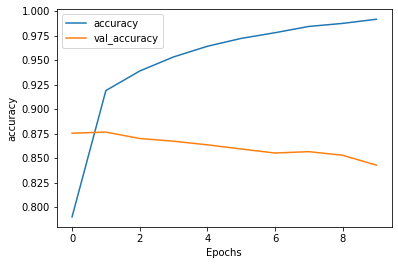

In [24]:
plot_graphs(history, 'accuracy')

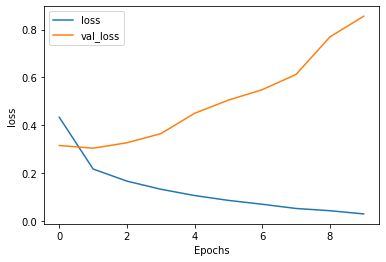

In [25]:
plot_graphs(history, 'loss')

# Compare different models

In [26]:
import tensorflow as tf
print(tf.__version__)

# !pip install -q tensorflow-datasets

2.2.0


In [27]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

In [28]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())

for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [29]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [30]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

? ? ? ? ? ? ? b'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them or why i admit i may have missed part of the film but i watched the majority of it and everything just seemed to happen of its own <OOV> without any real concern for anything else i cant recommend this film at all '
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of 

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                9600      
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [32]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
267/782 [=========>....................] - ETA: 0s - loss: 0.6951 - accuracy: 0.46 - ETA: 25s - loss: 0.6934 - accuracy: 0.520 - ETA: 26s - loss: 0.6933 - accuracy: 0.512 - ETA: 29s - loss: 0.6927 - accuracy: 0.526 - ETA: 29s - loss: 0.6924 - accuracy: 0.531 - ETA: 29s - loss: 0.6938 - accuracy: 0.500 - ETA: 31s - loss: 0.6936 - accuracy: 0.500 - ETA: 31s - loss: 0.6936 - accuracy: 0.504 - ETA: 30s - loss: 0.6938 - accuracy: 0.497 - ETA: 31s - loss: 0.6940 - accuracy: 0.498 - ETA: 31s - loss: 0.6938 - accuracy: 0.500 - ETA: 32s - loss: 0.6937 - accuracy: 0.504 - ETA: 32s - loss: 0.6934 - accuracy: 0.510 - ETA: 32s - loss: 0.6931 - accuracy: 0.515 - ETA: 32s - loss: 0.6935 - accuracy: 0.500 - ETA: 32s - loss: 0.6938 - accuracy: 0.490 - ETA: 32s - loss: 0.6939 - accuracy: 0.486 - ETA: 32s - loss: 0.6936 - accuracy: 0.498 - ETA: 32s - loss: 0.6936 - accuracy: 0.499 - ETA: 32s - loss: 0.6936 - accuracy: 0.502 - ETA: 32s - loss: 0.6935 - accuracy: 0.504 - ETA: 32s - loss: 0.6935 

357/782 [============>.................] - ETA: 0s - loss: 0.6924 - accuracy: 0.53 - ETA: 19s - loss: 0.6932 - accuracy: 0.500 - ETA: 24s - loss: 0.6919 - accuracy: 0.550 - ETA: 25s - loss: 0.6918 - accuracy: 0.553 - ETA: 26s - loss: 0.6916 - accuracy: 0.559 - ETA: 26s - loss: 0.6917 - accuracy: 0.554 - ETA: 27s - loss: 0.6919 - accuracy: 0.548 - ETA: 27s - loss: 0.6919 - accuracy: 0.545 - ETA: 27s - loss: 0.6920 - accuracy: 0.544 - ETA: 28s - loss: 0.6921 - accuracy: 0.539 - ETA: 28s - loss: 0.6919 - accuracy: 0.544 - ETA: 28s - loss: 0.6919 - accuracy: 0.546 - ETA: 28s - loss: 0.6921 - accuracy: 0.538 - ETA: 27s - loss: 0.6920 - accuracy: 0.540 - ETA: 27s - loss: 0.6923 - accuracy: 0.533 - ETA: 27s - loss: 0.6923 - accuracy: 0.533 - ETA: 27s - loss: 0.6921 - accuracy: 0.536 - ETA: 27s - loss: 0.6923 - accuracy: 0.533 - ETA: 27s - loss: 0.6922 - accuracy: 0.534 - ETA: 27s - loss: 0.6923 - accuracy: 0.532 - ETA: 27s - loss: 0.6923 - accuracy: 0.530 - ETA: 27s - loss: 0.6924 - accuracy:

782/782 [==============================] - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 0s - loss: 0.6932 - accuracy: 0.49 - ETA: 0s - loss: 0.6932 - accuracy: 0.49 - ETA: 0s - loss: 0.6932 - accuracy: 0.49 - ETA: 0s - loss: 0.6932 - accuracy: 0.49 - ETA: 0s - loss: 0.6932 - accuracy: 0.49 - ETA: 0s - loss: 0.6932 - accuracy: 0.49 - ETA: 0s - loss: 0.6932 - accuracy

356/782 [============>.................] - ETA: 0s - loss: 0.6931 - accuracy: 0.53 - ETA: 18s - loss: 0.6931 - accuracy: 0.510 - ETA: 24s - loss: 0.6931 - accuracy: 0.523 - ETA: 26s - loss: 0.6932 - accuracy: 0.494 - ETA: 26s - loss: 0.6931 - accuracy: 0.503 - ETA: 27s - loss: 0.6931 - accuracy: 0.518 - ETA: 27s - loss: 0.6931 - accuracy: 0.518 - ETA: 27s - loss: 0.6931 - accuracy: 0.515 - ETA: 27s - loss: 0.6931 - accuracy: 0.515 - ETA: 27s - loss: 0.6931 - accuracy: 0.506 - ETA: 27s - loss: 0.6931 - accuracy: 0.515 - ETA: 27s - loss: 0.6930 - accuracy: 0.524 - ETA: 27s - loss: 0.6931 - accuracy: 0.516 - ETA: 27s - loss: 0.6931 - accuracy: 0.508 - ETA: 27s - loss: 0.6931 - accuracy: 0.508 - ETA: 28s - loss: 0.6931 - accuracy: 0.508 - ETA: 28s - loss: 0.6931 - accuracy: 0.505 - ETA: 27s - loss: 0.6932 - accuracy: 0.502 - ETA: 27s - loss: 0.6932 - accuracy: 0.496 - ETA: 27s - loss: 0.6932 - accuracy: 0.500 - ETA: 27s - loss: 0.6932 - accuracy: 0.497 - ETA: 27s - loss: 0.6932 - accuracy:

782/782 [==============================] - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 0s - loss: 0.6932 - accuracy: 0.49 - ETA: 0s - loss: 0.6932 - accuracy: 0.49 - ETA: 0s - loss: 0.6932 - accuracy: 0.49 - ETA: 0s - loss: 0.6932 - accuracy: 0.49 - ETA: 0s - loss: 0.6932 - accuracy: 0.49 - ETA: 0s - loss: 0.6932 - accuracy: 0.49 - ETA: 0s - loss: 0.6932 - accuracy: 0.49 - ETA: 0s - loss: 0.6932 - accuracy

365/782 [=============>................] - ETA: 0s - loss: 0.6928 - accuracy: 0.56 - ETA: 19s - loss: 0.6929 - accuracy: 0.541 - ETA: 22s - loss: 0.6928 - accuracy: 0.556 - ETA: 24s - loss: 0.6928 - accuracy: 0.562 - ETA: 25s - loss: 0.6929 - accuracy: 0.541 - ETA: 26s - loss: 0.6930 - accuracy: 0.528 - ETA: 27s - loss: 0.6931 - accuracy: 0.516 - ETA: 27s - loss: 0.6930 - accuracy: 0.525 - ETA: 27s - loss: 0.6930 - accuracy: 0.520 - ETA: 27s - loss: 0.6930 - accuracy: 0.523 - ETA: 27s - loss: 0.6931 - accuracy: 0.511 - ETA: 27s - loss: 0.6931 - accuracy: 0.513 - ETA: 27s - loss: 0.6931 - accuracy: 0.516 - ETA: 27s - loss: 0.6931 - accuracy: 0.510 - ETA: 27s - loss: 0.6932 - accuracy: 0.503 - ETA: 27s - loss: 0.6932 - accuracy: 0.498 - ETA: 27s - loss: 0.6932 - accuracy: 0.499 - ETA: 27s - loss: 0.6932 - accuracy: 0.500 - ETA: 27s - loss: 0.6932 - accuracy: 0.495 - ETA: 27s - loss: 0.6932 - accuracy: 0.495 - ETA: 27s - loss: 0.6932 - accuracy: 0.497 - ETA: 27s - loss: 0.6932 - accuracy:

782/782 [==============================] - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 0s - loss: 0.6932 - accuracy: 0.49 - ETA: 0s - loss: 0.6932 - accuracy: 0.49 - ETA: 0s - loss: 0.6932 - accuracy: 0.49 - ETA: 0s - loss: 0.6932 - accuracy: 0.49 - ETA: 0s - loss: 0.6932 - accuracy: 0.49 - ETA: 0s - loss: 0.6932 - accuracy: 0.49 - ETA: 0s - loss: 0.6932 - accuracy

356/782 [============>.................] - ETA: 0s - loss: 0.6920 - accuracy: 0.59 - ETA: 20s - loss: 0.6937 - accuracy: 0.458 - ETA: 25s - loss: 0.6928 - accuracy: 0.531 - ETA: 28s - loss: 0.6927 - accuracy: 0.536 - ETA: 28s - loss: 0.6928 - accuracy: 0.527 - ETA: 28s - loss: 0.6928 - accuracy: 0.531 - ETA: 28s - loss: 0.6929 - accuracy: 0.526 - ETA: 29s - loss: 0.6929 - accuracy: 0.522 - ETA: 29s - loss: 0.6929 - accuracy: 0.519 - ETA: 29s - loss: 0.6930 - accuracy: 0.515 - ETA: 29s - loss: 0.6929 - accuracy: 0.518 - ETA: 29s - loss: 0.6930 - accuracy: 0.516 - ETA: 30s - loss: 0.6929 - accuracy: 0.521 - ETA: 30s - loss: 0.6930 - accuracy: 0.517 - ETA: 30s - loss: 0.6931 - accuracy: 0.508 - ETA: 30s - loss: 0.6930 - accuracy: 0.512 - ETA: 31s - loss: 0.6930 - accuracy: 0.514 - ETA: 31s - loss: 0.6930 - accuracy: 0.514 - ETA: 31s - loss: 0.6929 - accuracy: 0.518 - ETA: 31s - loss: 0.6930 - accuracy: 0.511 - ETA: 31s - loss: 0.6930 - accuracy: 0.513 - ETA: 31s - loss: 0.6930 - accuracy:

782/782 [==============================] - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy

282/782 [=========>....................] - ETA: 0s - loss: 0.6935 - accuracy: 0.43 - ETA: 19s - loss: 0.6934 - accuracy: 0.458 - ETA: 24s - loss: 0.6934 - accuracy: 0.462 - ETA: 25s - loss: 0.6933 - accuracy: 0.468 - ETA: 26s - loss: 0.6932 - accuracy: 0.482 - ETA: 27s - loss: 0.6932 - accuracy: 0.488 - ETA: 27s - loss: 0.6933 - accuracy: 0.478 - ETA: 27s - loss: 0.6932 - accuracy: 0.485 - ETA: 27s - loss: 0.6932 - accuracy: 0.479 - ETA: 28s - loss: 0.6932 - accuracy: 0.491 - ETA: 28s - loss: 0.6932 - accuracy: 0.490 - ETA: 29s - loss: 0.6932 - accuracy: 0.498 - ETA: 28s - loss: 0.6932 - accuracy: 0.496 - ETA: 28s - loss: 0.6932 - accuracy: 0.501 - ETA: 28s - loss: 0.6932 - accuracy: 0.494 - ETA: 29s - loss: 0.6932 - accuracy: 0.489 - ETA: 29s - loss: 0.6932 - accuracy: 0.485 - ETA: 29s - loss: 0.6932 - accuracy: 0.483 - ETA: 29s - loss: 0.6932 - accuracy: 0.486 - ETA: 29s - loss: 0.6932 - accuracy: 0.492 - ETA: 29s - loss: 0.6932 - accuracy: 0.494 - ETA: 29s - loss: 0.6932 - accuracy:

782/782 [==============================] - ETA: 13s - loss: 0.6932 - accuracy: 0.494 - ETA: 13s - loss: 0.6932 - accuracy: 0.494 - ETA: 13s - loss: 0.6932 - accuracy: 0.494 - ETA: 13s - loss: 0.6932 - accuracy: 0.494 - ETA: 13s - loss: 0.6932 - accuracy: 0.494 - ETA: 12s - loss: 0.6932 - accuracy: 0.494 - ETA: 12s - loss: 0.6932 - accuracy: 0.494 - ETA: 12s - loss: 0.6932 - accuracy: 0.494 - ETA: 12s - loss: 0.6932 - accuracy: 0.494 - ETA: 12s - loss: 0.6932 - accuracy: 0.494 - ETA: 12s - loss: 0.6932 - accuracy: 0.494 - ETA: 12s - loss: 0.6932 - accuracy: 0.494 - ETA: 12s - loss: 0.6932 - accuracy: 0.494 - ETA: 12s - loss: 0.6932 - accuracy: 0.494 - ETA: 12s - loss: 0.6932 - accuracy: 0.494 - ETA: 11s - loss: 0.6932 - accuracy: 0.494 - ETA: 11s - loss: 0.6932 - accuracy: 0.494 - ETA: 11s - loss: 0.6932 - accuracy: 0.494 - ETA: 11s - loss: 0.6932 - accuracy: 0.493 - ETA: 11s - loss: 0.6932 - accuracy: 0.493 - ETA: 11s - loss: 0.6932 - accuracy: 0.493 - ETA: 11s - loss: 0.6932 - accurac

310/782 [==========>...................] - ETA: 0s - loss: 0.6931 - accuracy: 0.50 - ETA: 21s - loss: 0.6932 - accuracy: 0.437 - ETA: 29s - loss: 0.6932 - accuracy: 0.453 - ETA: 34s - loss: 0.6932 - accuracy: 0.475 - ETA: 34s - loss: 0.6931 - accuracy: 0.495 - ETA: 33s - loss: 0.6931 - accuracy: 0.496 - ETA: 33s - loss: 0.6931 - accuracy: 0.502 - ETA: 34s - loss: 0.6931 - accuracy: 0.502 - ETA: 36s - loss: 0.6932 - accuracy: 0.495 - ETA: 37s - loss: 0.6932 - accuracy: 0.493 - ETA: 38s - loss: 0.6932 - accuracy: 0.497 - ETA: 39s - loss: 0.6932 - accuracy: 0.494 - ETA: 39s - loss: 0.6932 - accuracy: 0.496 - ETA: 39s - loss: 0.6932 - accuracy: 0.490 - ETA: 40s - loss: 0.6932 - accuracy: 0.491 - ETA: 40s - loss: 0.6932 - accuracy: 0.497 - ETA: 40s - loss: 0.6932 - accuracy: 0.493 - ETA: 39s - loss: 0.6932 - accuracy: 0.492 - ETA: 39s - loss: 0.6932 - accuracy: 0.493 - ETA: 38s - loss: 0.6932 - accuracy: 0.495 - ETA: 37s - loss: 0.6932 - accuracy: 0.489 - ETA: 37s - loss: 0.6932 - accuracy:

782/782 [==============================] - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 3s - loss: 0.6932 - accuracy: 0.49 - ETA: 3s - loss: 0.6932 - accuracy: 0.49 - ETA: 3s - loss: 0.6932 - accuracy

347/782 [============>.................] - ETA: 0s - loss: 0.6933 - accuracy: 0.46 - ETA: 18s - loss: 0.6930 - accuracy: 0.520 - ETA: 24s - loss: 0.6929 - accuracy: 0.554 - ETA: 26s - loss: 0.6930 - accuracy: 0.520 - ETA: 27s - loss: 0.6931 - accuracy: 0.515 - ETA: 27s - loss: 0.6931 - accuracy: 0.518 - ETA: 27s - loss: 0.6931 - accuracy: 0.513 - ETA: 27s - loss: 0.6931 - accuracy: 0.515 - ETA: 27s - loss: 0.6931 - accuracy: 0.513 - ETA: 27s - loss: 0.6931 - accuracy: 0.515 - ETA: 27s - loss: 0.6931 - accuracy: 0.517 - ETA: 27s - loss: 0.6931 - accuracy: 0.514 - ETA: 27s - loss: 0.6931 - accuracy: 0.509 - ETA: 27s - loss: 0.6930 - accuracy: 0.519 - ETA: 27s - loss: 0.6931 - accuracy: 0.515 - ETA: 27s - loss: 0.6931 - accuracy: 0.516 - ETA: 27s - loss: 0.6931 - accuracy: 0.515 - ETA: 27s - loss: 0.6931 - accuracy: 0.515 - ETA: 27s - loss: 0.6931 - accuracy: 0.512 - ETA: 27s - loss: 0.6931 - accuracy: 0.504 - ETA: 27s - loss: 0.6931 - accuracy: 0.507 - ETA: 27s - loss: 0.6931 - accuracy:

782/782 [==============================] - ETA: 3s - loss: 0.6932 - accuracy: 0.49 - ETA: 3s - loss: 0.6932 - accuracy: 0.49 - ETA: 3s - loss: 0.6932 - accuracy: 0.49 - ETA: 3s - loss: 0.6932 - accuracy: 0.49 - ETA: 3s - loss: 0.6932 - accuracy: 0.49 - ETA: 3s - loss: 0.6932 - accuracy: 0.49 - ETA: 3s - loss: 0.6932 - accuracy: 0.49 - ETA: 3s - loss: 0.6932 - accuracy: 0.49 - ETA: 3s - loss: 0.6932 - accuracy: 0.49 - ETA: 3s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy

347/782 [============>.................] - ETA: 0s - loss: 0.6924 - accuracy: 0.59 - ETA: 22s - loss: 0.6931 - accuracy: 0.510 - ETA: 25s - loss: 0.6931 - accuracy: 0.512 - ETA: 26s - loss: 0.6931 - accuracy: 0.504 - ETA: 28s - loss: 0.6930 - accuracy: 0.513 - ETA: 30s - loss: 0.6931 - accuracy: 0.509 - ETA: 30s - loss: 0.6932 - accuracy: 0.497 - ETA: 30s - loss: 0.6931 - accuracy: 0.502 - ETA: 31s - loss: 0.6932 - accuracy: 0.500 - ETA: 31s - loss: 0.6932 - accuracy: 0.494 - ETA: 31s - loss: 0.6932 - accuracy: 0.493 - ETA: 32s - loss: 0.6932 - accuracy: 0.493 - ETA: 32s - loss: 0.6931 - accuracy: 0.503 - ETA: 32s - loss: 0.6932 - accuracy: 0.492 - ETA: 32s - loss: 0.6932 - accuracy: 0.491 - ETA: 32s - loss: 0.6932 - accuracy: 0.491 - ETA: 33s - loss: 0.6933 - accuracy: 0.483 - ETA: 33s - loss: 0.6933 - accuracy: 0.484 - ETA: 33s - loss: 0.6933 - accuracy: 0.487 - ETA: 33s - loss: 0.6933 - accuracy: 0.486 - ETA: 33s - loss: 0.6933 - accuracy: 0.485 - ETA: 33s - loss: 0.6933 - accuracy:

782/782 [==============================] - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy

341/782 [============>.................] - ETA: 0s - loss: 0.6936 - accuracy: 0.46 - ETA: 23s - loss: 0.6936 - accuracy: 0.468 - ETA: 24s - loss: 0.6933 - accuracy: 0.493 - ETA: 26s - loss: 0.6931 - accuracy: 0.504 - ETA: 27s - loss: 0.6932 - accuracy: 0.500 - ETA: 27s - loss: 0.6933 - accuracy: 0.491 - ETA: 27s - loss: 0.6933 - accuracy: 0.490 - ETA: 27s - loss: 0.6933 - accuracy: 0.493 - ETA: 27s - loss: 0.6932 - accuracy: 0.498 - ETA: 27s - loss: 0.6933 - accuracy: 0.490 - ETA: 27s - loss: 0.6933 - accuracy: 0.488 - ETA: 27s - loss: 0.6933 - accuracy: 0.487 - ETA: 27s - loss: 0.6934 - accuracy: 0.482 - ETA: 27s - loss: 0.6934 - accuracy: 0.481 - ETA: 27s - loss: 0.6934 - accuracy: 0.484 - ETA: 27s - loss: 0.6933 - accuracy: 0.487 - ETA: 27s - loss: 0.6934 - accuracy: 0.486 - ETA: 27s - loss: 0.6934 - accuracy: 0.484 - ETA: 27s - loss: 0.6934 - accuracy: 0.484 - ETA: 27s - loss: 0.6934 - accuracy: 0.476 - ETA: 27s - loss: 0.6934 - accuracy: 0.476 - ETA: 27s - loss: 0.6934 - accuracy:

782/782 [==============================] - ETA: 3s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy

311/782 [==========>...................] - ETA: 0s - loss: 0.6940 - accuracy: 0.43 - ETA: 18s - loss: 0.6935 - accuracy: 0.479 - ETA: 27s - loss: 0.6939 - accuracy: 0.445 - ETA: 28s - loss: 0.6940 - accuracy: 0.437 - ETA: 28s - loss: 0.6939 - accuracy: 0.445 - ETA: 31s - loss: 0.6937 - accuracy: 0.461 - ETA: 31s - loss: 0.6938 - accuracy: 0.457 - ETA: 32s - loss: 0.6938 - accuracy: 0.455 - ETA: 32s - loss: 0.6936 - accuracy: 0.471 - ETA: 33s - loss: 0.6935 - accuracy: 0.474 - ETA: 34s - loss: 0.6934 - accuracy: 0.481 - ETA: 35s - loss: 0.6935 - accuracy: 0.472 - ETA: 34s - loss: 0.6936 - accuracy: 0.470 - ETA: 33s - loss: 0.6936 - accuracy: 0.464 - ETA: 33s - loss: 0.6936 - accuracy: 0.464 - ETA: 33s - loss: 0.6936 - accuracy: 0.468 - ETA: 34s - loss: 0.6935 - accuracy: 0.471 - ETA: 33s - loss: 0.6935 - accuracy: 0.474 - ETA: 34s - loss: 0.6935 - accuracy: 0.471 - ETA: 34s - loss: 0.6935 - accuracy: 0.473 - ETA: 34s - loss: 0.6934 - accuracy: 0.482 - ETA: 34s - loss: 0.6934 - accuracy:

782/782 [==============================] - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy

321/782 [===========>..................] - ETA: 0s - loss: 0.6930 - accuracy: 0.53 - ETA: 20s - loss: 0.6930 - accuracy: 0.531 - ETA: 24s - loss: 0.6929 - accuracy: 0.556 - ETA: 25s - loss: 0.6929 - accuracy: 0.544 - ETA: 29s - loss: 0.6929 - accuracy: 0.541 - ETA: 30s - loss: 0.6930 - accuracy: 0.528 - ETA: 31s - loss: 0.6930 - accuracy: 0.531 - ETA: 31s - loss: 0.6930 - accuracy: 0.526 - ETA: 32s - loss: 0.6931 - accuracy: 0.517 - ETA: 31s - loss: 0.6931 - accuracy: 0.519 - ETA: 32s - loss: 0.6931 - accuracy: 0.514 - ETA: 31s - loss: 0.6931 - accuracy: 0.510 - ETA: 31s - loss: 0.6931 - accuracy: 0.512 - ETA: 31s - loss: 0.6931 - accuracy: 0.512 - ETA: 30s - loss: 0.6931 - accuracy: 0.516 - ETA: 30s - loss: 0.6931 - accuracy: 0.511 - ETA: 30s - loss: 0.6931 - accuracy: 0.514 - ETA: 30s - loss: 0.6931 - accuracy: 0.514 - ETA: 30s - loss: 0.6931 - accuracy: 0.510 - ETA: 30s - loss: 0.6931 - accuracy: 0.509 - ETA: 30s - loss: 0.6931 - accuracy: 0.507 - ETA: 30s - loss: 0.6932 - accuracy:

782/782 [==============================] - ETA: 6s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy

358/782 [============>.................] - ETA: 0s - loss: 0.6927 - accuracy: 0.53 - ETA: 22s - loss: 0.6932 - accuracy: 0.500 - ETA: 26s - loss: 0.6925 - accuracy: 0.537 - ETA: 27s - loss: 0.6928 - accuracy: 0.522 - ETA: 27s - loss: 0.6926 - accuracy: 0.531 - ETA: 27s - loss: 0.6928 - accuracy: 0.519 - ETA: 27s - loss: 0.6929 - accuracy: 0.516 - ETA: 27s - loss: 0.6929 - accuracy: 0.518 - ETA: 27s - loss: 0.6929 - accuracy: 0.516 - ETA: 27s - loss: 0.6929 - accuracy: 0.518 - ETA: 27s - loss: 0.6928 - accuracy: 0.520 - ETA: 27s - loss: 0.6929 - accuracy: 0.516 - ETA: 28s - loss: 0.6929 - accuracy: 0.515 - ETA: 28s - loss: 0.6927 - accuracy: 0.524 - ETA: 28s - loss: 0.6927 - accuracy: 0.526 - ETA: 28s - loss: 0.6925 - accuracy: 0.533 - ETA: 28s - loss: 0.6926 - accuracy: 0.529 - ETA: 28s - loss: 0.6927 - accuracy: 0.525 - ETA: 27s - loss: 0.6926 - accuracy: 0.529 - ETA: 28s - loss: 0.6927 - accuracy: 0.525 - ETA: 28s - loss: 0.6926 - accuracy: 0.529 - ETA: 28s - loss: 0.6926 - accuracy:

782/782 [==============================] - ETA: 3s - loss: 0.6932 - accuracy: 0.50 - ETA: 3s - loss: 0.6932 - accuracy: 0.50 - ETA: 3s - loss: 0.6932 - accuracy: 0.50 - ETA: 3s - loss: 0.6932 - accuracy: 0.50 - ETA: 3s - loss: 0.6932 - accuracy: 0.50 - ETA: 3s - loss: 0.6932 - accuracy: 0.50 - ETA: 2s - loss: 0.6932 - accuracy: 0.50 - ETA: 2s - loss: 0.6932 - accuracy: 0.50 - ETA: 2s - loss: 0.6932 - accuracy: 0.50 - ETA: 2s - loss: 0.6932 - accuracy: 0.50 - ETA: 2s - loss: 0.6932 - accuracy: 0.50 - ETA: 2s - loss: 0.6932 - accuracy: 0.50 - ETA: 2s - loss: 0.6932 - accuracy: 0.50 - ETA: 2s - loss: 0.6932 - accuracy: 0.50 - ETA: 2s - loss: 0.6932 - accuracy: 0.50 - ETA: 2s - loss: 0.6932 - accuracy: 0.50 - ETA: 2s - loss: 0.6932 - accuracy: 0.50 - ETA: 2s - loss: 0.6932 - accuracy: 0.50 - ETA: 2s - loss: 0.6932 - accuracy: 0.50 - ETA: 2s - loss: 0.6932 - accuracy: 0.50 - ETA: 1s - loss: 0.6932 - accuracy: 0.50 - ETA: 1s - loss: 0.6932 - accuracy: 0.50 - ETA: 1s - loss: 0.6932 - accuracy

326/782 [===========>..................] - ETA: 0s - loss: 0.6934 - accuracy: 0.46 - ETA: 18s - loss: 0.6930 - accuracy: 0.520 - ETA: 24s - loss: 0.6930 - accuracy: 0.515 - ETA: 27s - loss: 0.6933 - accuracy: 0.479 - ETA: 28s - loss: 0.6934 - accuracy: 0.472 - ETA: 29s - loss: 0.6932 - accuracy: 0.490 - ETA: 31s - loss: 0.6933 - accuracy: 0.485 - ETA: 32s - loss: 0.6933 - accuracy: 0.474 - ETA: 33s - loss: 0.6934 - accuracy: 0.461 - ETA: 34s - loss: 0.6934 - accuracy: 0.466 - ETA: 34s - loss: 0.6934 - accuracy: 0.468 - ETA: 35s - loss: 0.6934 - accuracy: 0.470 - ETA: 35s - loss: 0.6933 - accuracy: 0.470 - ETA: 35s - loss: 0.6933 - accuracy: 0.470 - ETA: 35s - loss: 0.6933 - accuracy: 0.468 - ETA: 35s - loss: 0.6933 - accuracy: 0.474 - ETA: 34s - loss: 0.6933 - accuracy: 0.478 - ETA: 34s - loss: 0.6933 - accuracy: 0.477 - ETA: 33s - loss: 0.6933 - accuracy: 0.476 - ETA: 33s - loss: 0.6933 - accuracy: 0.475 - ETA: 33s - loss: 0.6933 - accuracy: 0.478 - ETA: 33s - loss: 0.6933 - accuracy:

782/782 [==============================] - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 3s - loss: 0.6932 - accuracy: 0.49 - ETA: 3s - loss: 0.6932 - accuracy: 0.49 - ETA: 3s - loss: 0.6932 - accuracy: 0.49 - ETA: 3s - loss: 0.6932 - accuracy

231/782 [=======>......................] - ETA: 0s - loss: 0.6938 - accuracy: 0.37 - ETA: 24s - loss: 0.6935 - accuracy: 0.437 - ETA: 35s - loss: 0.6935 - accuracy: 0.427 - ETA: 37s - loss: 0.6935 - accuracy: 0.429 - ETA: 38s - loss: 0.6934 - accuracy: 0.443 - ETA: 38s - loss: 0.6934 - accuracy: 0.442 - ETA: 37s - loss: 0.6933 - accuracy: 0.449 - ETA: 37s - loss: 0.6933 - accuracy: 0.447 - ETA: 38s - loss: 0.6933 - accuracy: 0.437 - ETA: 38s - loss: 0.6933 - accuracy: 0.437 - ETA: 38s - loss: 0.6933 - accuracy: 0.432 - ETA: 38s - loss: 0.6933 - accuracy: 0.430 - ETA: 40s - loss: 0.6933 - accuracy: 0.431 - ETA: 41s - loss: 0.6933 - accuracy: 0.441 - ETA: 42s - loss: 0.6933 - accuracy: 0.448 - ETA: 44s - loss: 0.6932 - accuracy: 0.454 - ETA: 44s - loss: 0.6932 - accuracy: 0.462 - ETA: 44s - loss: 0.6932 - accuracy: 0.471 - ETA: 44s - loss: 0.6932 - accuracy: 0.476 - ETA: 44s - loss: 0.6932 - accuracy: 0.481 - ETA: 44s - loss: 0.6932 - accuracy: 0.482 - ETA: 44s - loss: 0.6932 - accuracy:

213/782 [=======>......................] - ETA: 0s - loss: 0.6931 - accuracy: 0.50 - ETA: 24s - loss: 0.6931 - accuracy: 0.541 - ETA: 27s - loss: 0.6931 - accuracy: 0.546 - ETA: 34s - loss: 0.6931 - accuracy: 0.525 - ETA: 35s - loss: 0.6931 - accuracy: 0.544 - ETA: 37s - loss: 0.6931 - accuracy: 0.539 - ETA: 37s - loss: 0.6931 - accuracy: 0.552 - ETA: 37s - loss: 0.6931 - accuracy: 0.553 - ETA: 38s - loss: 0.6931 - accuracy: 0.557 - ETA: 38s - loss: 0.6931 - accuracy: 0.560 - ETA: 39s - loss: 0.6931 - accuracy: 0.546 - ETA: 40s - loss: 0.6931 - accuracy: 0.545 - ETA: 40s - loss: 0.6932 - accuracy: 0.533 - ETA: 40s - loss: 0.6932 - accuracy: 0.527 - ETA: 40s - loss: 0.6932 - accuracy: 0.519 - ETA: 40s - loss: 0.6932 - accuracy: 0.508 - ETA: 40s - loss: 0.6932 - accuracy: 0.506 - ETA: 41s - loss: 0.6932 - accuracy: 0.501 - ETA: 40s - loss: 0.6932 - accuracy: 0.508 - ETA: 41s - loss: 0.6932 - accuracy: 0.511 - ETA: 42s - loss: 0.6932 - accuracy: 0.513 - ETA: 42s - loss: 0.6932 - accuracy:

782/782 [==============================] - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 6s - loss: 0.6932 - accuracy: 0.49 - ETA: 6s - loss: 0.6932 - accuracy: 0.49 - ETA: 6s - loss: 0.6932 - accuracy: 0.49 - ETA: 6s - loss: 0.6932 - accuracy: 0.49 - ETA: 6s - loss: 0.6932 - accuracy: 0.49 - ETA: 6s - loss: 0.6932 - accuracy: 0.49 - ETA: 6s - loss: 0.6932 - accuracy: 0.49 - ETA: 6s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy

293/782 [==========>...................] - ETA: 0s - loss: 0.6942 - accuracy: 0.40 - ETA: 21s - loss: 0.6939 - accuracy: 0.437 - ETA: 25s - loss: 0.6931 - accuracy: 0.507 - ETA: 28s - loss: 0.6932 - accuracy: 0.500 - ETA: 28s - loss: 0.6931 - accuracy: 0.503 - ETA: 29s - loss: 0.6933 - accuracy: 0.490 - ETA: 30s - loss: 0.6933 - accuracy: 0.488 - ETA: 31s - loss: 0.6934 - accuracy: 0.478 - ETA: 32s - loss: 0.6934 - accuracy: 0.481 - ETA: 33s - loss: 0.6933 - accuracy: 0.484 - ETA: 32s - loss: 0.6933 - accuracy: 0.489 - ETA: 33s - loss: 0.6933 - accuracy: 0.490 - ETA: 33s - loss: 0.6932 - accuracy: 0.494 - ETA: 33s - loss: 0.6933 - accuracy: 0.491 - ETA: 33s - loss: 0.6933 - accuracy: 0.487 - ETA: 33s - loss: 0.6933 - accuracy: 0.490 - ETA: 33s - loss: 0.6932 - accuracy: 0.493 - ETA: 33s - loss: 0.6932 - accuracy: 0.494 - ETA: 33s - loss: 0.6933 - accuracy: 0.490 - ETA: 33s - loss: 0.6932 - accuracy: 0.493 - ETA: 33s - loss: 0.6932 - accuracy: 0.493 - ETA: 33s - loss: 0.6932 - accuracy:

782/782 [==============================] - ETA: 11s - loss: 0.6932 - accuracy: 0.500 - ETA: 11s - loss: 0.6932 - accuracy: 0.500 - ETA: 11s - loss: 0.6932 - accuracy: 0.499 - ETA: 11s - loss: 0.6932 - accuracy: 0.500 - ETA: 11s - loss: 0.6932 - accuracy: 0.500 - ETA: 11s - loss: 0.6932 - accuracy: 0.500 - ETA: 11s - loss: 0.6932 - accuracy: 0.499 - ETA: 10s - loss: 0.6932 - accuracy: 0.500 - ETA: 10s - loss: 0.6932 - accuracy: 0.499 - ETA: 10s - loss: 0.6932 - accuracy: 0.499 - ETA: 10s - loss: 0.6932 - accuracy: 0.500 - ETA: 10s - loss: 0.6932 - accuracy: 0.500 - ETA: 10s - loss: 0.6932 - accuracy: 0.499 - ETA: 10s - loss: 0.6932 - accuracy: 0.500 - ETA: 10s - loss: 0.6932 - accuracy: 0.499 - ETA: 10s - loss: 0.6932 - accuracy: 0.499 - ETA: 10s - loss: 0.6932 - accuracy: 0.499 - ETA: 10s - loss: 0.6932 - accuracy: 0.499 - ETA: 10s - loss: 0.6932 - accuracy: 0.499 - ETA: 9s - loss: 0.6932 - accuracy: 0.500 - ETA: 9s - loss: 0.6932 - accuracy: 0.50 - ETA: 9s - loss: 0.6932 - accuracy: 0

335/782 [===========>..................] - ETA: 0s - loss: 0.6932 - accuracy: 0.34 - ETA: 21s - loss: 0.6932 - accuracy: 0.437 - ETA: 25s - loss: 0.6932 - accuracy: 0.450 - ETA: 29s - loss: 0.6932 - accuracy: 0.468 - ETA: 32s - loss: 0.6932 - accuracy: 0.464 - ETA: 33s - loss: 0.6932 - accuracy: 0.472 - ETA: 34s - loss: 0.6932 - accuracy: 0.471 - ETA: 34s - loss: 0.6932 - accuracy: 0.474 - ETA: 34s - loss: 0.6931 - accuracy: 0.493 - ETA: 33s - loss: 0.6932 - accuracy: 0.478 - ETA: 33s - loss: 0.6932 - accuracy: 0.477 - ETA: 32s - loss: 0.6932 - accuracy: 0.482 - ETA: 33s - loss: 0.6932 - accuracy: 0.484 - ETA: 33s - loss: 0.6932 - accuracy: 0.487 - ETA: 34s - loss: 0.6932 - accuracy: 0.485 - ETA: 34s - loss: 0.6932 - accuracy: 0.480 - ETA: 34s - loss: 0.6932 - accuracy: 0.476 - ETA: 35s - loss: 0.6932 - accuracy: 0.476 - ETA: 34s - loss: 0.6932 - accuracy: 0.471 - ETA: 35s - loss: 0.6932 - accuracy: 0.471 - ETA: 35s - loss: 0.6932 - accuracy: 0.475 - ETA: 35s - loss: 0.6932 - accuracy:

782/782 [==============================] - ETA: 3s - loss: 0.6932 - accuracy: 0.49 - ETA: 3s - loss: 0.6932 - accuracy: 0.49 - ETA: 3s - loss: 0.6932 - accuracy: 0.49 - ETA: 3s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy

364/782 [============>.................] - ETA: 0s - loss: 0.6933 - accuracy: 0.46 - ETA: 20s - loss: 0.6929 - accuracy: 0.541 - ETA: 24s - loss: 0.6931 - accuracy: 0.518 - ETA: 25s - loss: 0.6930 - accuracy: 0.531 - ETA: 27s - loss: 0.6930 - accuracy: 0.527 - ETA: 28s - loss: 0.6929 - accuracy: 0.542 - ETA: 28s - loss: 0.6930 - accuracy: 0.526 - ETA: 29s - loss: 0.6930 - accuracy: 0.525 - ETA: 29s - loss: 0.6930 - accuracy: 0.531 - ETA: 29s - loss: 0.6930 - accuracy: 0.524 - ETA: 29s - loss: 0.6930 - accuracy: 0.522 - ETA: 29s - loss: 0.6930 - accuracy: 0.523 - ETA: 29s - loss: 0.6931 - accuracy: 0.516 - ETA: 29s - loss: 0.6931 - accuracy: 0.514 - ETA: 29s - loss: 0.6932 - accuracy: 0.504 - ETA: 29s - loss: 0.6932 - accuracy: 0.504 - ETA: 29s - loss: 0.6932 - accuracy: 0.498 - ETA: 29s - loss: 0.6932 - accuracy: 0.502 - ETA: 29s - loss: 0.6932 - accuracy: 0.502 - ETA: 29s - loss: 0.6932 - accuracy: 0.500 - ETA: 29s - loss: 0.6932 - accuracy: 0.499 - ETA: 29s - loss: 0.6932 - accuracy:

782/782 [==============================] - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 2s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 1s - loss: 0.6932 - accuracy: 0.49 - ETA: 0s - loss: 0.6932 - accuracy: 0.49 - ETA: 0s - loss: 0.6932 - accuracy: 0.49 - ETA: 0s - loss: 0.6932 - accuracy: 0.49 - ETA: 0s - loss: 0.6932 - accuracy: 0.49 - ETA: 0s - loss: 0.6932 - accuracy: 0.49 - ETA: 0s - loss: 0.6932 - accuracy

348/782 [============>.................] - ETA: 0s - loss: 0.6931 - accuracy: 0.53 - ETA: 18s - loss: 0.6931 - accuracy: 0.500 - ETA: 23s - loss: 0.6932 - accuracy: 0.481 - ETA: 24s - loss: 0.6932 - accuracy: 0.491 - ETA: 26s - loss: 0.6931 - accuracy: 0.500 - ETA: 27s - loss: 0.6932 - accuracy: 0.494 - ETA: 28s - loss: 0.6931 - accuracy: 0.500 - ETA: 28s - loss: 0.6932 - accuracy: 0.497 - ETA: 28s - loss: 0.6931 - accuracy: 0.503 - ETA: 28s - loss: 0.6932 - accuracy: 0.498 - ETA: 28s - loss: 0.6932 - accuracy: 0.489 - ETA: 28s - loss: 0.6932 - accuracy: 0.490 - ETA: 28s - loss: 0.6932 - accuracy: 0.493 - ETA: 28s - loss: 0.6932 - accuracy: 0.486 - ETA: 28s - loss: 0.6932 - accuracy: 0.483 - ETA: 28s - loss: 0.6932 - accuracy: 0.491 - ETA: 28s - loss: 0.6932 - accuracy: 0.496 - ETA: 28s - loss: 0.6932 - accuracy: 0.498 - ETA: 28s - loss: 0.6932 - accuracy: 0.505 - ETA: 28s - loss: 0.6932 - accuracy: 0.500 - ETA: 28s - loss: 0.6932 - accuracy: 0.504 - ETA: 28s - loss: 0.6932 - accuracy:

782/782 [==============================] - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 5s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 4s - loss: 0.6932 - accuracy: 0.49 - ETA: 3s - loss: 0.6932 - accuracy: 0.49 - ETA: 3s - loss: 0.6932 - accuracy: 0.49 - ETA: 3s - loss: 0.6932 - accuracy

342/782 [============>.................] - ETA: 0s - loss: 0.6930 - accuracy: 0.53 - ETA: 18s - loss: 0.6934 - accuracy: 0.437 - ETA: 23s - loss: 0.6932 - accuracy: 0.500 - ETA: 26s - loss: 0.6932 - accuracy: 0.477 - ETA: 28s - loss: 0.6933 - accuracy: 0.465 - ETA: 29s - loss: 0.6933 - accuracy: 0.460 - ETA: 29s - loss: 0.6932 - accuracy: 0.478 - ETA: 29s - loss: 0.6932 - accuracy: 0.485 - ETA: 30s - loss: 0.6932 - accuracy: 0.488 - ETA: 30s - loss: 0.6932 - accuracy: 0.493 - ETA: 30s - loss: 0.6932 - accuracy: 0.504 - ETA: 30s - loss: 0.6932 - accuracy: 0.509 - ETA: 30s - loss: 0.6932 - accuracy: 0.510 - ETA: 30s - loss: 0.6932 - accuracy: 0.512 - ETA: 29s - loss: 0.6931 - accuracy: 0.512 - ETA: 29s - loss: 0.6931 - accuracy: 0.514 - ETA: 29s - loss: 0.6932 - accuracy: 0.510 - ETA: 29s - loss: 0.6931 - accuracy: 0.512 - ETA: 29s - loss: 0.6931 - accuracy: 0.513 - ETA: 29s - loss: 0.6931 - accuracy: 0.517 - ETA: 29s - loss: 0.6931 - accuracy: 0.518 - ETA: 29s - loss: 0.6931 - accuracy:

782/782 [==============================] - ETA: 6s - loss: 0.6932 - accuracy: 0.50 - ETA: 6s - loss: 0.6932 - accuracy: 0.50 - ETA: 6s - loss: 0.6932 - accuracy: 0.50 - ETA: 6s - loss: 0.6932 - accuracy: 0.50 - ETA: 5s - loss: 0.6932 - accuracy: 0.50 - ETA: 5s - loss: 0.6932 - accuracy: 0.50 - ETA: 5s - loss: 0.6932 - accuracy: 0.50 - ETA: 5s - loss: 0.6932 - accuracy: 0.50 - ETA: 5s - loss: 0.6932 - accuracy: 0.50 - ETA: 5s - loss: 0.6932 - accuracy: 0.50 - ETA: 5s - loss: 0.6932 - accuracy: 0.50 - ETA: 5s - loss: 0.6932 - accuracy: 0.50 - ETA: 5s - loss: 0.6932 - accuracy: 0.50 - ETA: 5s - loss: 0.6932 - accuracy: 0.50 - ETA: 5s - loss: 0.6932 - accuracy: 0.50 - ETA: 5s - loss: 0.6932 - accuracy: 0.50 - ETA: 5s - loss: 0.6932 - accuracy: 0.50 - ETA: 5s - loss: 0.6932 - accuracy: 0.50 - ETA: 5s - loss: 0.6932 - accuracy: 0.50 - ETA: 5s - loss: 0.6932 - accuracy: 0.50 - ETA: 4s - loss: 0.6932 - accuracy: 0.50 - ETA: 4s - loss: 0.6932 - accuracy: 0.50 - ETA: 4s - loss: 0.6932 - accuracy

315/782 [===========>..................] - ETA: 0s - loss: 0.6932 - accuracy: 0.46 - ETA: 23s - loss: 0.6930 - accuracy: 0.572 - ETA: 27s - loss: 0.6931 - accuracy: 0.543 - ETA: 30s - loss: 0.6931 - accuracy: 0.540 - ETA: 31s - loss: 0.6931 - accuracy: 0.527 - ETA: 32s - loss: 0.6931 - accuracy: 0.509 - ETA: 32s - loss: 0.6931 - accuracy: 0.510 - ETA: 33s - loss: 0.6931 - accuracy: 0.509 - ETA: 34s - loss: 0.6932 - accuracy: 0.497 - ETA: 34s - loss: 0.6932 - accuracy: 0.502 - ETA: 34s - loss: 0.6932 - accuracy: 0.501 - ETA: 35s - loss: 0.6932 - accuracy: 0.498 - ETA: 34s - loss: 0.6932 - accuracy: 0.494 - ETA: 34s - loss: 0.6932 - accuracy: 0.491 - ETA: 34s - loss: 0.6932 - accuracy: 0.485 - ETA: 33s - loss: 0.6932 - accuracy: 0.490 - ETA: 33s - loss: 0.6932 - accuracy: 0.491 - ETA: 33s - loss: 0.6932 - accuracy: 0.497 - ETA: 33s - loss: 0.6932 - accuracy: 0.498 - ETA: 33s - loss: 0.6932 - accuracy: 0.496 - ETA: 33s - loss: 0.6932 - accuracy: 0.490 - ETA: 33s - loss: 0.6932 - accuracy:

782/782 [==============================] - ETA: 8s - loss: 0.6932 - accuracy: 0.50 - ETA: 8s - loss: 0.6932 - accuracy: 0.50 - ETA: 8s - loss: 0.6932 - accuracy: 0.50 - ETA: 8s - loss: 0.6932 - accuracy: 0.49 - ETA: 8s - loss: 0.6932 - accuracy: 0.49 - ETA: 8s - loss: 0.6932 - accuracy: 0.50 - ETA: 8s - loss: 0.6932 - accuracy: 0.50 - ETA: 8s - loss: 0.6932 - accuracy: 0.50 - ETA: 8s - loss: 0.6932 - accuracy: 0.50 - ETA: 8s - loss: 0.6932 - accuracy: 0.50 - ETA: 8s - loss: 0.6932 - accuracy: 0.49 - ETA: 8s - loss: 0.6932 - accuracy: 0.50 - ETA: 8s - loss: 0.6932 - accuracy: 0.50 - ETA: 8s - loss: 0.6932 - accuracy: 0.50 - ETA: 8s - loss: 0.6932 - accuracy: 0.50 - ETA: 7s - loss: 0.6932 - accuracy: 0.50 - ETA: 7s - loss: 0.6932 - accuracy: 0.50 - ETA: 7s - loss: 0.6932 - accuracy: 0.50 - ETA: 7s - loss: 0.6932 - accuracy: 0.50 - ETA: 7s - loss: 0.6932 - accuracy: 0.50 - ETA: 7s - loss: 0.6932 - accuracy: 0.50 - ETA: 7s - loss: 0.6932 - accuracy: 0.50 - ETA: 7s - loss: 0.6932 - accuracy

285/782 [=========>....................] - ETA: 0s - loss: 0.6934 - accuracy: 0.46 - ETA: 19s - loss: 0.6937 - accuracy: 0.421 - ETA: 25s - loss: 0.6937 - accuracy: 0.429 - ETA: 26s - loss: 0.6933 - accuracy: 0.489 - ETA: 28s - loss: 0.6932 - accuracy: 0.495 - ETA: 28s - loss: 0.6932 - accuracy: 0.489 - ETA: 28s - loss: 0.6931 - accuracy: 0.502 - ETA: 28s - loss: 0.6932 - accuracy: 0.492 - ETA: 28s - loss: 0.6933 - accuracy: 0.479 - ETA: 29s - loss: 0.6934 - accuracy: 0.470 - ETA: 29s - loss: 0.6933 - accuracy: 0.480 - ETA: 29s - loss: 0.6932 - accuracy: 0.490 - ETA: 29s - loss: 0.6933 - accuracy: 0.487 - ETA: 29s - loss: 0.6932 - accuracy: 0.488 - ETA: 29s - loss: 0.6933 - accuracy: 0.484 - ETA: 29s - loss: 0.6932 - accuracy: 0.487 - ETA: 30s - loss: 0.6932 - accuracy: 0.491 - ETA: 29s - loss: 0.6932 - accuracy: 0.500 - ETA: 29s - loss: 0.6932 - accuracy: 0.500 - ETA: 29s - loss: 0.6932 - accuracy: 0.499 - ETA: 29s - loss: 0.6932 - accuracy: 0.499 - ETA: 29s - loss: 0.6932 - accuracy:

782/782 [==============================] - ETA: 12s - loss: 0.6932 - accuracy: 0.491 - ETA: 12s - loss: 0.6932 - accuracy: 0.491 - ETA: 12s - loss: 0.6932 - accuracy: 0.491 - ETA: 12s - loss: 0.6932 - accuracy: 0.491 - ETA: 12s - loss: 0.6932 - accuracy: 0.492 - ETA: 12s - loss: 0.6932 - accuracy: 0.492 - ETA: 12s - loss: 0.6932 - accuracy: 0.492 - ETA: 12s - loss: 0.6932 - accuracy: 0.492 - ETA: 12s - loss: 0.6932 - accuracy: 0.491 - ETA: 12s - loss: 0.6932 - accuracy: 0.491 - ETA: 11s - loss: 0.6932 - accuracy: 0.491 - ETA: 11s - loss: 0.6932 - accuracy: 0.491 - ETA: 11s - loss: 0.6932 - accuracy: 0.491 - ETA: 11s - loss: 0.6932 - accuracy: 0.491 - ETA: 11s - loss: 0.6932 - accuracy: 0.491 - ETA: 11s - loss: 0.6932 - accuracy: 0.491 - ETA: 11s - loss: 0.6932 - accuracy: 0.491 - ETA: 11s - loss: 0.6932 - accuracy: 0.491 - ETA: 11s - loss: 0.6932 - accuracy: 0.492 - ETA: 11s - loss: 0.6932 - accuracy: 0.492 - ETA: 10s - loss: 0.6932 - accuracy: 0.491 - ETA: 10s - loss: 0.6932 - accurac

288/782 [==========>...................] - ETA: 0s - loss: 0.6931 - accuracy: 0.50 - ETA: 20s - loss: 0.6933 - accuracy: 0.359 - ETA: 28s - loss: 0.6932 - accuracy: 0.437 - ETA: 31s - loss: 0.6932 - accuracy: 0.437 - ETA: 33s - loss: 0.6932 - accuracy: 0.447 - ETA: 37s - loss: 0.6932 - accuracy: 0.488 - ETA: 39s - loss: 0.6932 - accuracy: 0.482 - ETA: 41s - loss: 0.6932 - accuracy: 0.487 - ETA: 43s - loss: 0.6931 - accuracy: 0.494 - ETA: 43s - loss: 0.6931 - accuracy: 0.500 - ETA: 43s - loss: 0.6931 - accuracy: 0.497 - ETA: 41s - loss: 0.6931 - accuracy: 0.504 - ETA: 41s - loss: 0.6931 - accuracy: 0.505 - ETA: 41s - loss: 0.6931 - accuracy: 0.509 - ETA: 40s - loss: 0.6931 - accuracy: 0.514 - ETA: 40s - loss: 0.6931 - accuracy: 0.512 - ETA: 40s - loss: 0.6931 - accuracy: 0.512 - ETA: 40s - loss: 0.6931 - accuracy: 0.511 - ETA: 41s - loss: 0.6931 - accuracy: 0.511 - ETA: 41s - loss: 0.6931 - accuracy: 0.508 - ETA: 41s - loss: 0.6931 - accuracy: 0.509 - ETA: 41s - loss: 0.6931 - accuracy:

782/782 [==============================] - ETA: 9s - loss: 0.6931 - accuracy: 0.50 - ETA: 9s - loss: 0.6931 - accuracy: 0.50 - ETA: 9s - loss: 0.6931 - accuracy: 0.50 - ETA: 9s - loss: 0.6931 - accuracy: 0.50 - ETA: 9s - loss: 0.6931 - accuracy: 0.50 - ETA: 9s - loss: 0.6931 - accuracy: 0.50 - ETA: 9s - loss: 0.6931 - accuracy: 0.50 - ETA: 9s - loss: 0.6931 - accuracy: 0.50 - ETA: 8s - loss: 0.6931 - accuracy: 0.50 - ETA: 8s - loss: 0.6931 - accuracy: 0.50 - ETA: 8s - loss: 0.6931 - accuracy: 0.50 - ETA: 8s - loss: 0.6931 - accuracy: 0.50 - ETA: 8s - loss: 0.6931 - accuracy: 0.50 - ETA: 8s - loss: 0.6931 - accuracy: 0.50 - ETA: 8s - loss: 0.6931 - accuracy: 0.50 - ETA: 8s - loss: 0.6931 - accuracy: 0.50 - ETA: 8s - loss: 0.6931 - accuracy: 0.50 - ETA: 8s - loss: 0.6931 - accuracy: 0.50 - ETA: 7s - loss: 0.6931 - accuracy: 0.50 - ETA: 7s - loss: 0.6931 - accuracy: 0.50 - ETA: 7s - loss: 0.6931 - accuracy: 0.50 - ETA: 7s - loss: 0.6931 - accuracy: 0.50 - ETA: 7s - loss: 0.6931 - accuracy

274/782 [=========>....................] - ETA: 0s - loss: 0.6935 - accuracy: 0.43 - ETA: 23s - loss: 0.6932 - accuracy: 0.489 - ETA: 28s - loss: 0.6933 - accuracy: 0.475 - ETA: 31s - loss: 0.6935 - accuracy: 0.453 - ETA: 35s - loss: 0.6932 - accuracy: 0.491 - ETA: 36s - loss: 0.6932 - accuracy: 0.496 - ETA: 36s - loss: 0.6931 - accuracy: 0.503 - ETA: 36s - loss: 0.6930 - accuracy: 0.517 - ETA: 38s - loss: 0.6931 - accuracy: 0.502 - ETA: 38s - loss: 0.6931 - accuracy: 0.506 - ETA: 38s - loss: 0.6931 - accuracy: 0.508 - ETA: 38s - loss: 0.6931 - accuracy: 0.507 - ETA: 39s - loss: 0.6930 - accuracy: 0.516 - ETA: 39s - loss: 0.6931 - accuracy: 0.512 - ETA: 39s - loss: 0.6930 - accuracy: 0.518 - ETA: 39s - loss: 0.6930 - accuracy: 0.513 - ETA: 42s - loss: 0.6930 - accuracy: 0.514 - ETA: 43s - loss: 0.6930 - accuracy: 0.517 - ETA: 43s - loss: 0.6931 - accuracy: 0.510 - ETA: 43s - loss: 0.6930 - accuracy: 0.513 - ETA: 43s - loss: 0.6930 - accuracy: 0.514 - ETA: 43s - loss: 0.6930 - accuracy:

782/782 [==============================] - ETA: 10s - loss: 0.6932 - accuracy: 0.502 - ETA: 10s - loss: 0.6932 - accuracy: 0.502 - ETA: 10s - loss: 0.6932 - accuracy: 0.503 - ETA: 10s - loss: 0.6932 - accuracy: 0.502 - ETA: 10s - loss: 0.6932 - accuracy: 0.502 - ETA: 10s - loss: 0.6932 - accuracy: 0.502 - ETA: 10s - loss: 0.6932 - accuracy: 0.502 - ETA: 10s - loss: 0.6932 - accuracy: 0.502 - ETA: 9s - loss: 0.6932 - accuracy: 0.502 - ETA: 9s - loss: 0.6932 - accuracy: 0.50 - ETA: 9s - loss: 0.6932 - accuracy: 0.50 - ETA: 9s - loss: 0.6932 - accuracy: 0.50 - ETA: 9s - loss: 0.6932 - accuracy: 0.50 - ETA: 9s - loss: 0.6932 - accuracy: 0.50 - ETA: 9s - loss: 0.6932 - accuracy: 0.50 - ETA: 9s - loss: 0.6932 - accuracy: 0.50 - ETA: 9s - loss: 0.6932 - accuracy: 0.50 - ETA: 9s - loss: 0.6932 - accuracy: 0.50 - ETA: 9s - loss: 0.6932 - accuracy: 0.50 - ETA: 8s - loss: 0.6932 - accuracy: 0.50 - ETA: 8s - loss: 0.6932 - accuracy: 0.50 - ETA: 8s - loss: 0.6932 - accuracy: 0.50 - ETA: 8s - loss: 

307/782 [==========>...................] - ETA: 0s - loss: 0.6928 - accuracy: 0.56 - ETA: 21s - loss: 0.6930 - accuracy: 0.520 - ETA: 28s - loss: 0.6933 - accuracy: 0.476 - ETA: 29s - loss: 0.6933 - accuracy: 0.474 - ETA: 31s - loss: 0.6933 - accuracy: 0.476 - ETA: 33s - loss: 0.6933 - accuracy: 0.475 - ETA: 34s - loss: 0.6933 - accuracy: 0.485 - ETA: 35s - loss: 0.6933 - accuracy: 0.476 - ETA: 35s - loss: 0.6933 - accuracy: 0.475 - ETA: 35s - loss: 0.6933 - accuracy: 0.480 - ETA: 36s - loss: 0.6932 - accuracy: 0.489 - ETA: 36s - loss: 0.6932 - accuracy: 0.486 - ETA: 36s - loss: 0.6932 - accuracy: 0.496 - ETA: 36s - loss: 0.6932 - accuracy: 0.494 - ETA: 35s - loss: 0.6932 - accuracy: 0.484 - ETA: 36s - loss: 0.6932 - accuracy: 0.486 - ETA: 36s - loss: 0.6933 - accuracy: 0.481 - ETA: 36s - loss: 0.6932 - accuracy: 0.484 - ETA: 36s - loss: 0.6933 - accuracy: 0.480 - ETA: 36s - loss: 0.6932 - accuracy: 0.482 - ETA: 36s - loss: 0.6933 - accuracy: 0.480 - ETA: 36s - loss: 0.6933 - accuracy:

782/782 [==============================] - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 6s - loss: 0.6932 - accuracy: 0.49 - ETA: 6s - loss: 0.6932 - accuracy: 0.49 - ETA: 6s - loss: 0.6932 - accuracy: 0.49 - ETA: 6s - loss: 0.6932 - accuracy: 0.49 - ETA: 6s - loss: 0.6932 - accuracy: 0.49 - ETA: 6s - loss: 0.6932 - accuracy: 0.49 - ETA: 6s - loss: 0.6932 - accuracy: 0.49 - ETA: 6s - loss: 0.6932 - accuracy

283/782 [=========>....................] - ETA: 0s - loss: 0.6932 - accuracy: 0.46 - ETA: 20s - loss: 0.6932 - accuracy: 0.489 - ETA: 27s - loss: 0.6932 - accuracy: 0.481 - ETA: 29s - loss: 0.6932 - accuracy: 0.486 - ETA: 29s - loss: 0.6932 - accuracy: 0.479 - ETA: 31s - loss: 0.6932 - accuracy: 0.457 - ETA: 31s - loss: 0.6932 - accuracy: 0.463 - ETA: 32s - loss: 0.6932 - accuracy: 0.471 - ETA: 33s - loss: 0.6932 - accuracy: 0.477 - ETA: 33s - loss: 0.6931 - accuracy: 0.489 - ETA: 32s - loss: 0.6931 - accuracy: 0.490 - ETA: 32s - loss: 0.6932 - accuracy: 0.485 - ETA: 33s - loss: 0.6932 - accuracy: 0.488 - ETA: 33s - loss: 0.6932 - accuracy: 0.489 - ETA: 33s - loss: 0.6932 - accuracy: 0.489 - ETA: 33s - loss: 0.6931 - accuracy: 0.491 - ETA: 33s - loss: 0.6931 - accuracy: 0.495 - ETA: 33s - loss: 0.6931 - accuracy: 0.494 - ETA: 33s - loss: 0.6931 - accuracy: 0.496 - ETA: 34s - loss: 0.6931 - accuracy: 0.497 - ETA: 34s - loss: 0.6931 - accuracy: 0.500 - ETA: 34s - loss: 0.6931 - accuracy:

782/782 [==============================] - ETA: 8s - loss: 0.6932 - accuracy: 0.49 - ETA: 8s - loss: 0.6932 - accuracy: 0.49 - ETA: 8s - loss: 0.6932 - accuracy: 0.49 - ETA: 8s - loss: 0.6932 - accuracy: 0.49 - ETA: 8s - loss: 0.6932 - accuracy: 0.49 - ETA: 8s - loss: 0.6932 - accuracy: 0.49 - ETA: 8s - loss: 0.6932 - accuracy: 0.49 - ETA: 8s - loss: 0.6932 - accuracy: 0.49 - ETA: 8s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy: 0.49 - ETA: 7s - loss: 0.6932 - accuracy

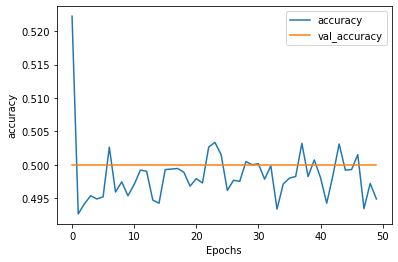

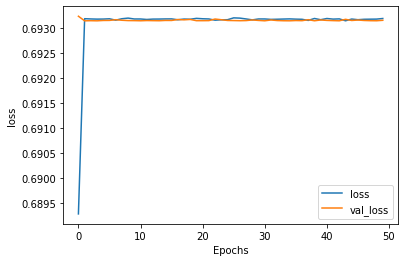

In [33]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [34]:
# Model Definition with LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Model Definition with Conv1D
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_________________________________________________________________


# Exploring different sequence models

## 1) Sarcasm with Bidirectional LSTM

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

In [2]:
import numpy as np
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


with open("source/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []
urls = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 50
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)


NotImplementedError: Cannot convert a symbolic Tensor (bidirectional_1/forward_lstm_1/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

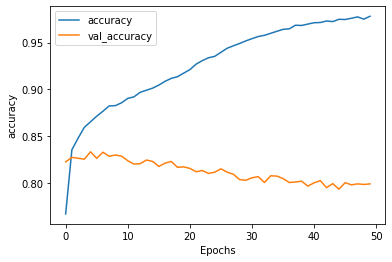

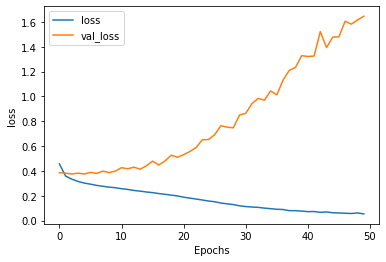

In [38]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [39]:
model.save("test.h5")

## 2) Sarcasm with 1D Convolutional Layer

In [ ]:
import numpy as np

import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


with open("tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)


sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 50

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
model.save("test.h5")